In [1]:
import numpy as np


In [2]:
import yfinance as yf
import pandas as pd


# Specify the tickers
tickers = ['AAPL', 'GOOGL']

# Set the start and end dates for the data
start_date = '2023-12-04'
end_date = '2023-12-05'

# Create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Fetch and combine historical stock data for each ticker
for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date, interval="1m")
    stock_data['Ticker'] = ticker  # Add a 'Ticker' column to identify the source
    combined_df = pd.concat([combined_df, stock_data])

# Display the combined data
print(combined_df.head())


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AAPL: 1m data not available for startTime=1701648000 and endTime=1701734400. The requested range must be within the last 30 days.
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- GOOGL: 1m data not available for startTime=1701648000 and endTime=1701734400. The requested range must be within the last 30 days.
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, Ticker]
Index: []


In [87]:
sample = "AAPL"

sample_df = combined_df[combined_df["Ticker"] == sample]

In [88]:
#Calculate moving averages
sample_df['MA 15 days'] = sample_df['Adj Close'].shift(15).rolling(window=15, min_periods=1).mean()

C:\Users\henri\AppData\Local\Temp\ipykernel_7500\1888225645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['MA 15 days'] = sample_df['Adj Close'].shift(15).rolling(window=15, min_periods=1).mean()


In [89]:
#Calculate change
sample_df["Change"] = sample_df["Adj Close"] - sample_df["Adj Close"].shift(1)
sample_df["Gain"] = sample_df["Change"].apply(lambda x: x if x >= 0 else 0)
sample_df["Avg Gain"] = sample_df["Gain"].shift(1).rolling(window=14, min_periods=1).mean()
sample_df["Loss"] = sample_df["Change"].apply(lambda x: abs(x) if x <= 0 else 0)
sample_df["Avg Loss"] = sample_df["Loss"].shift(1).rolling(window=14, min_periods=1).mean()

#Calculate RSI
sample_df["RS"] = sample_df["Avg Gain"] / sample_df["Avg Loss"]
sample_df["RSI"] = sample_df["RS"].apply(lambda x: 100-(100/(1 + x)) if x != 0 else 100)

#Set first 14 rows to NaN
sample_df.loc[:15, ["RSI", "RS", "Avg Gain", "Avg Loss"]] = np.nan

C:\Users\henri\AppData\Local\Temp\ipykernel_7500\2158786475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df["Change"] = sample_df["Adj Close"] - sample_df["Adj Close"].shift(1)
C:\Users\henri\AppData\Local\Temp\ipykernel_7500\2158786475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df["Gain"] = sample_df["Change"].apply(lambda x: x if x >= 0 else 0)
C:\Users\henri\AppData\Local\Temp\ipykernel_7500\2158786475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

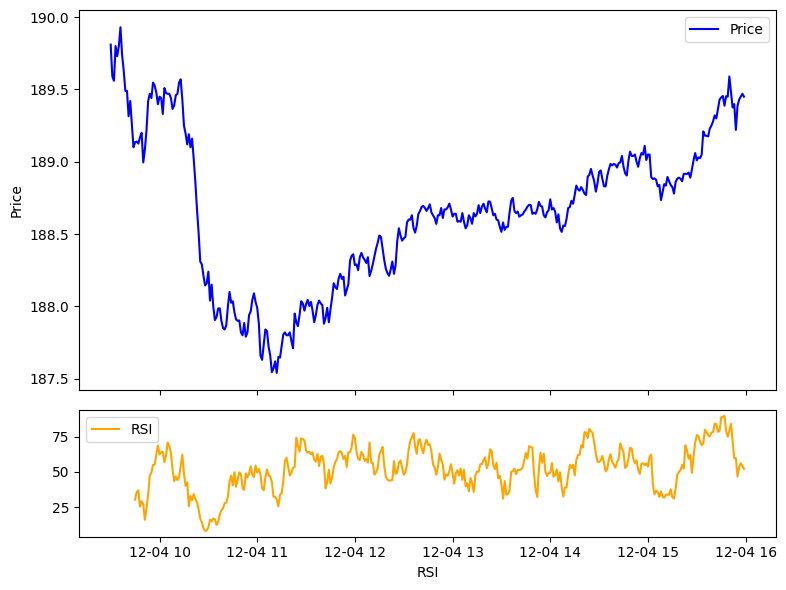

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots with different sizes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# Plotting the first line (Y1) on the top subplot
ax1.plot(sample_df.index, sample_df['Adj Close'], label='Price', color='blue')

# Customize the top subplot
ax1.set_ylabel('Price')
ax1.legend()

# Plotting the second line (Y2) as a horizontal line on the bottom subplot
ax2.plot(sample_df.index, sample_df['RSI'], label='RSI', color='orange')

# Customize the bottom subplot
ax2.set_xlabel('RSI')
ax2.set_ylabel('')
ax2.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

# Export data to a csv
sample_df.to_csv("Output.csv")


c:\Users\henri\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


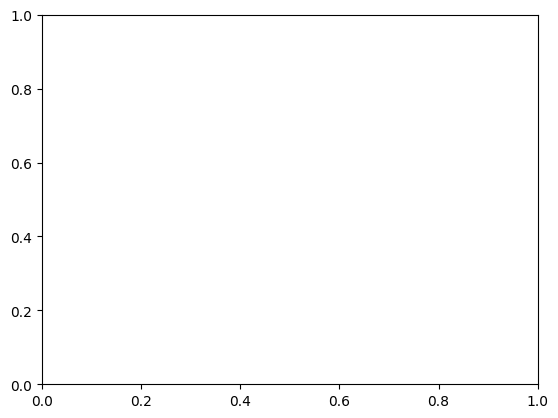

In [8]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np


# Sample data generation within a while loop
num_items = 100
max_iterations = 1000

# Initialize an empty list for each item's values
item_values = [[] for _ in range(num_items)]

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Function to update the plot for each iteration
def update(frame):
    # Generate values for each item (replace this with your logic)
    values = [np.random.rand() for _ in range(num_items)]

    # Update the values for each item in the list
    for i in range(num_items):
        item_values[i].append(values[i])

    # Clear the previous plot and plot the updated values
    ax.clear()
    for i in range(num_items):
        ax.plot(item_values[i], label=f'Item {i+1}')

    ax.legend()  # Add legend for better readability
    ax.set_title('Dynamic Line Graph')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Value')

# Create an animation and assign it to a variable
ani = animation.FuncAnimation(fig, update, frames=max_iterations, repeat=False)

# Display the animation
plt.ion()
plt.show()
